**Assignment 3 - Building CNN model for classification of flowers**

In [27]:
#Loading dataset into notebook via google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Unzipping the dataset
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

## Data Augmentation

In [95]:
#Importing libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [96]:
#Data Augmentation on training data
train_data = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [97]:
#Data Augmentation on testing data
test_data = ImageDataGenerator(rescale=1./255)

In [98]:
#Downloading split-folders module to split the data into train and test datasets
! pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
#Splitting the data into train and test datas
import splitfolders
input_folder='/content/flowers'
splitfolders.ratio(input_folder,output="dataset",seed=42,ratio=(.8,.2,.0),group_prefix=None)

Copying files: 4317 files [00:01, 3854.01 files/s]


In [100]:
#Listing the directories with each file in it
!ls -laRh dataset/

dataset/:
total 20K
drwxr-xr-x 5 root root 4.0K Oct  9 05:44 .
drwxr-xr-x 1 root root 4.0K Oct  9 06:24 ..
drwxr-xr-x 7 root root 4.0K Oct  9 05:44 test
drwxr-xr-x 7 root root 4.0K Oct  9 05:44 train
drwxr-xr-x 7 root root 4.0K Oct  9 05:44 val

dataset/test:
total 28K
drwxr-xr-x 7 root root 4.0K Oct  9 05:44 .
drwxr-xr-x 5 root root 4.0K Oct  9 05:44 ..
drwxr-xr-x 2 root root 4.0K Oct  9 05:44 daisy
drwxr-xr-x 2 root root 4.0K Oct  9 05:44 dandelion
drwxr-xr-x 2 root root 4.0K Oct  9 05:44 rose
drwxr-xr-x 2 root root 4.0K Oct  9 05:44 sunflower
drwxr-xr-x 2 root root 4.0K Oct  9 05:44 tulip

dataset/test/daisy:
total 36K
drwxr-xr-x 2 root root 4.0K Oct  9 05:44 .
drwxr-xr-x 7 root root 4.0K Oct  9 05:44 ..
-rw-r--r-- 1 root root  25K Jul 16  2021 6864242336_0d12713fe5_n.jpg

dataset/test/dandelion:
total 72K
drwxr-xr-x 2 root root 4.0K Oct  9 05:44 .
drwxr-xr-x 7 root root 4.0K Oct  9 05:44 ..
-rw-r--r-- 1 root root  61K Jul 16  2021 17619402434_15b2ec2d79.jpg

dataset/test/rose:
tota

In [101]:
train_dataset = train_data.flow_from_directory(r"/content/dataset/train",
                                           target_size=(180,180),
                                           class_mode='categorical')

Found 3452 images belonging to 5 classes.


In [102]:
#Here val is same as test. Since we use split-folders module, it calls both test
#and validate. We shall consider validate as test
test_dataset = test_data.flow_from_directory(r"/content/dataset/val",
                                           target_size=(180,180),
                                           class_mode='categorical')

Found 860 images belonging to 5 classes.


## Model Creation

In [103]:
#Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [104]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 253472)            0         
                                                                 
 dense_12 (Dense)            (None, 300)               76041900  
                                                                 
 dense_13 (Dense)            (None, 150)               45150     
                                                                 
 dense_14 (Dense)            (None, 5)                 755       
                                                      

In [106]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
#Training the model
y = model.fit_generator(train_dataset,
                        steps_per_epoch=108,
                        epochs=15,
                        validation_data=test_dataset,
                        validation_steps=27)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
108/108 [==============================] - 37s 339ms/step - loss: 3.6573 - accuracy: 0.4140 - val_loss: 1.0775 - val_accuracy: 0.5419
Epoch 2/15
108/108 [==============================] - 31s 285ms/step - loss: 1.0961 - accuracy: 0.5643 - val_loss: 1.0126 - val_accuracy: 0.6093
Epoch 3/15
108/108 [==============================] - 32s 292ms/step - loss: 0.9918 - accuracy: 0.6144 - val_loss: 1.1281 - val_accuracy: 0.5872
Epoch 4/15
108/108 [==============================] - 31s 286ms/step - loss: 0.8913 - accuracy: 0.6599 - val_loss: 1.0438 - val_accuracy: 0.6174
Epoch 5/15
108/108 [==============================] - 31s 284ms/step - loss: 0.8535 - accuracy: 0.6837 - val_loss: 0.9360 - val_accuracy: 0.6465
Epoch 6/15
108/108 [==============================] - 31s 286ms/step - loss: 0.7828 - accuracy: 0.7002 - val_loss: 0.9532 - val_accuracy: 0.6419
Epoch 7/15
108/108 [==============================] - 31s 283ms/step - loss: 0.7305 - accuracy: 0.7222 - val_loss: 1.0196 - val_ac

## Plotting the accuracy during training and validation

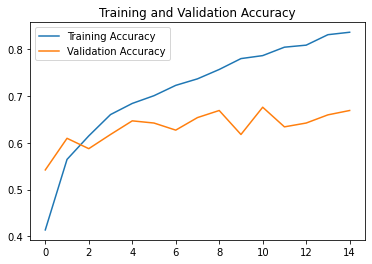

In [108]:
import matplotlib.pyplot as plt
epochs = range(0,15)
plt.plot(epochs, y.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, y.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [109]:
model.save('flower_classification.h5')

## Testing the model

In [110]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [111]:
#Installing pillow to resize image
! pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
from PIL import Image
i = Image.open('/content/dataset/test/daisy/6864242336_0d12713fe5_n.jpg')
i = i.resize((180,180))
x = image.img_to_array(i)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'

In [113]:
i = Image.open('/content/dataset/train/sunflower/10386525005_fd0b7d6c55_n.jpg')
i = i.resize((180,180))
x = image.img_to_array(i)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'

In [114]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## Model Tuning

In [116]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5)

lr = ReduceLROnPlateau(monitor='val_accuaracy', 
                       factor=0.5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

In [117]:
model.fit_generator(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=100,
                    callbacks=callback,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
108/108 [==============================] - ETA: 0s - loss: 0.2885 - accuracy: 0.9015

108/108 [==============================] - 34s 312ms/step - loss: 0.2885 - accuracy: 0.9015 - val_loss: 1.2374 - val_accuracy: 0.6930 - lr: 0.0010
Epoch 2/100
108/108 [==============================] - ETA: 0s - loss: 0.2885 - accuracy: 0.9053

108/108 [==============================] - 33s 309ms/step - loss: 0.2885 - accuracy: 0.9053 - val_loss: 1.1704 - val_accuracy: 0.6628 - lr: 0.0010
Epoch 3/100
108/108 [==============================] - ETA: 0s - loss: 0.2834 - accuracy: 0.8975

108/108 [==============================] - 31s 283ms/step - loss: 0.2834 - accuracy: 0.8975 - val_loss: 1.3387 - val_accuracy: 0.6849 - lr: 0.0010
Epoch 4/100
108/108 [==============================] - ETA: 0s - loss: 0.2972 - accuracy: 0.8975

108/108 [==============================] - 31s 291ms/step - loss: 0.2972 - accuracy: 0.8975 - val_loss: 1.3272 - val_accuracy: 0.6663 - lr: 0.0010
Epoch 5/100
108/108 [==============================] - ETA: 0s - loss: 0.2264 - accuracy: 0.9235

108/108 [==============================] - 34s 313ms/step - loss: 0.2264 - accuracy: 0.9235 - val_loss: 1.4385 - val_accuracy: 0.6756 - lr: 0.0010
Epoch 6/100
108/108 [==============================] - ETA: 0s - loss: 0.2217 - accuracy: 0.9261

108/108 [==============================] - 33s 301ms/step - loss: 0.2217 - accuracy: 0.9261 - val_loss: 1.3616 - val_accuracy: 0.6884 - lr: 0.0010


In [118]:
i = Image.open('/content/dataset/test/rose/7419966772_d6c1c22a81.jpg')
i = i.resize((180,180))
x = image.img_to_array(i)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'rose'

In [119]:
model.save('flower_classification_tuned.h5')